# Trump 新聞資料分析

資料來源：https://github.com/daphnetykuo/datascience/blob/master/hw4-6/ETF/bbc_selenium.ipynb  
主題：分析BBC新聞網上搜尋「Trump」所出現的新聞中，內容經常出現的關鍵字詞有哪些與其關聯性分析。

In [2]:
import pickle
import re
import time
import numpy as np
import pandas as pd
from optparse import OptionParser
from pandas import DataFrame, read_csv
path='./data/'

In [3]:
with open('bbc_trump', 'rb') as file:
    news = pickle.load(file)

#print(news)

In [4]:
news_df = pd.DataFrame(news)
news_df = news_df[['time', 'title', 'summary', 'doc']]
news_df.head()

,time,title,summary,doc
0,5 Nov 2018,Panorama: Trump: What Next?,…Will President Trump be forced out of office?...,On the eve of the most important US midterm el...
1,16 Jul 2018,Trump: A Very British Welcome?,…As Trump touches down for his first President...,As Trump touches down for his first Presidenti...
2,26 Mar 2019,"HARDtalk: George Papadopoulos, Former Trump Ca...",…Stephen Sackur speaks to former Trump campaig...,Stephen Sackur speaks to former Trump campaign...
3,6 May 2019,World Snooker Championship: John Higgins pots ...,… chases a maximum break against Judd Trump in...,John Higgins pots an incredible double before ...
4,9 Jul 2018,Panorama: Trump: Is the President a Sex Pest?,…Donald Trump has been accused of sexually ina...,What is the truth about Donald Trump's behavio...


In [5]:
pd.to_pickle(news_df, 'news_df.pkl')

with open('news_df.pkl', 'rb') as fout:
    allData = pickle.load(fout)
allData.head()

,time,title,summary,doc
0,5 Nov 2018,Panorama: Trump: What Next?,…Will President Trump be forced out of office?...,On the eve of the most important US midterm el...
1,16 Jul 2018,Trump: A Very British Welcome?,…As Trump touches down for his first President...,As Trump touches down for his first Presidenti...
2,26 Mar 2019,"HARDtalk: George Papadopoulos, Former Trump Ca...",…Stephen Sackur speaks to former Trump campaig...,Stephen Sackur speaks to former Trump campaign...
3,6 May 2019,World Snooker Championship: John Higgins pots ...,… chases a maximum break against Judd Trump in...,John Higgins pots an incredible double before ...
4,9 Jul 2018,Panorama: Trump: Is the President a Sex Pest?,…Donald Trump has been accused of sexually ina...,What is the truth about Donald Trump's behavio...


In [6]:
corpus = allData['doc'].values.tolist()

### 內文預處理

In [7]:
# TF-IDF 
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()
#print(word)

from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [8]:
len(corpus)

119

In [10]:
features = tfidf.toarray()
labels = allData['title'].values
#labels

In [11]:
textFrame = pd.DataFrame(features, columns = word)
textFrame.head()
#len(features)

119

In [12]:
allF = features.flatten()   # 折疊成一維陣列
nonZero = allF[np.nonzero(allF)]   # 返回非零數值
m = np.median(nonZero)    # 中位數

In [13]:
allF[np.nonzero(allF)]

array([0.07745985, 0.02902094, 0.1706401 , ..., 0.06563859, 0.12699487,
       0.18019707])

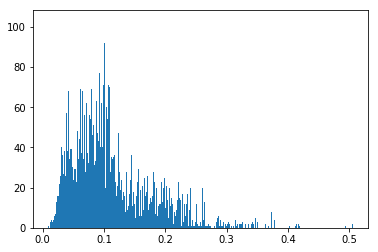

0.09868539809718777

In [17]:
import matplotlib.pyplot as plt
plt.hist(nonZero, bins=500)  # bins: bar數量
plt.show()
m

### 篩選關鍵字

In [18]:
m = 0.1    # setting threshold
dataset = []
for i in range(len(features)):
    temp = textFrame.columns.values[[textFrame.iloc[i] >= m]]
    dataset.append(temp.tolist())

/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


In [19]:
for i in range(len(features)):
    print(dataset[i])

['allegations', 'colluded', 'down', 'elections', 'eve', 'examines', 'generation', 'important', 'midterm', 'most', 'of', 'panorama', 'presidency', 'russia', 'the', 'to', 'will', 'win', 'with']
['as', 'bbc', 'behind', 'ben', 'britain', 'course', 'crazy', 'down', 'far', 'first', 'for', 'go', 'goes', 'gone', 'lovers', 'one', 'over', 'presidential', 'reporter', 'scenes', 'the', 'think', 'those', 'three', 'too', 'touches', 'trump', 'uk', 'visit', 'weekend', 'well', 'will', 'young', 'zand']
['advisor', 'aside', 'be', 'campaign', 'cloud', 'convicted', 'evaporated', 'exoneration', 'first', 'former', 'george', 'horizon', 'massive', 'member', 'mueller', 'papadopoulos', 'posturing', 'probe', 'result', 'robert', 'russians', 'sackur', 'speaks', 'stephen', 'the', 'to', 'trump', 'was']
['135', 'against', 'an', 'before', 'black', 'break', 'breakavailable', 'championship', 'chases', 'double', 'final', 'higgins', 'incredible', 'john', 'judd', 'maximum', 'missing', 'more', 'only', 'pots', 'showboats', 'sn

In [20]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,00,000,10,11,12,13,135,14,1400,141,...,yemen,yet,york,you,young,zand,zealand,zeid,zeinab,zurcher
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

minsupp = 0.1   # setting threshold
apriori(df, min_support = minsupp, use_colnames=True)

,support,itemsets
0,0.109244,(2019)
1,0.109244,(about)
2,0.100840,(all)
3,0.243697,(and)
4,0.100840,(at)
5,0.159664,(championship)
6,0.176471,(coverage)
7,0.126050,(crucible)
8,0.100840,(episodes)
9,0.159664,(from)


In [24]:
result = apriori(df, min_support = minsupp, use_colnames=True)

In [28]:
rules = association_rules(result, metric="confidence", min_threshold=0.7)

In [30]:
rules = association_rules(result, metric="lift", min_threshold=1.2)
rules.head()   # 2766 rows

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(championship),(2019),0.159664,0.109244,0.109244,0.684211,6.263158,0.091801,2.820728
1,(2019),(championship),0.109244,0.159664,0.109244,1.000000,6.263158,0.091801,inf
2,(crucible),(2019),0.126050,0.109244,0.100840,0.800000,7.323077,0.087070,4.453782
3,(2019),(crucible),0.109244,0.126050,0.100840,0.923077,7.323077,0.087070,11.361345
4,(snooker),(2019),0.176471,0.109244,0.109244,0.619048,5.666667,0.089965,2.338235


In [32]:
rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,(championship),(2019),0.159664,0.109244,0.109244,0.684211,6.263158,0.091801,2.820728,1
1,(2019),(championship),0.109244,0.159664,0.109244,1.000000,6.263158,0.091801,inf,1
2,(crucible),(2019),0.126050,0.109244,0.100840,0.800000,7.323077,0.087070,4.453782,1
3,(2019),(crucible),0.109244,0.126050,0.100840,0.923077,7.323077,0.087070,11.361345,1
4,(snooker),(2019),0.176471,0.109244,0.109244,0.619048,5.666667,0.089965,2.338235,1


In [34]:
out = rules[(rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.85) &
       (rules['lift'] > 7.5) ]
out.head()   # 963 rows

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
134,"(all, from)",(episodes),0.10084,0.10084,0.10084,1.0,9.916667,0.090672,inf,2
136,"(from, episodes)",(all),0.10084,0.10084,0.10084,1.0,9.916667,0.090672,inf,2
140,"(all, in)",(episodes),0.10084,0.10084,0.10084,1.0,9.916667,0.090672,inf,2
142,"(in, episodes)",(all),0.10084,0.10084,0.10084,1.0,9.916667,0.090672,inf,2
146,"(all, see)",(episodes),0.10084,0.10084,0.10084,1.0,9.916667,0.090672,inf,2


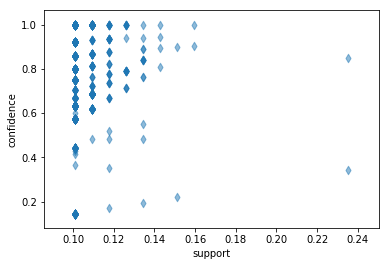

In [35]:
import matplotlib.pyplot as plt
support = rules['support']
confidence = rules['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="d")  # alpha: 透明度
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [36]:
rules['antecedents'].head()

0    (championship)
1            (2019)
2        (crucible)
3            (2019)
4         (snooker)
Name: antecedents, dtype: object

### 繪製共線圖

In [39]:
import networkx as nx
G = nx.DiGraph()   # directed graph
for i in range(len(allData)):
    G.add_node(i)
for i in range(len(rules['antecedents'])):
    currentFrom = list(rules['antecedents'][i])
    currentTo = list(rules['consequents'][i])
    #print(currentFrom[0], currentTo[0])
    #G.add_edge(currentFrom[j], currentTo[0])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])

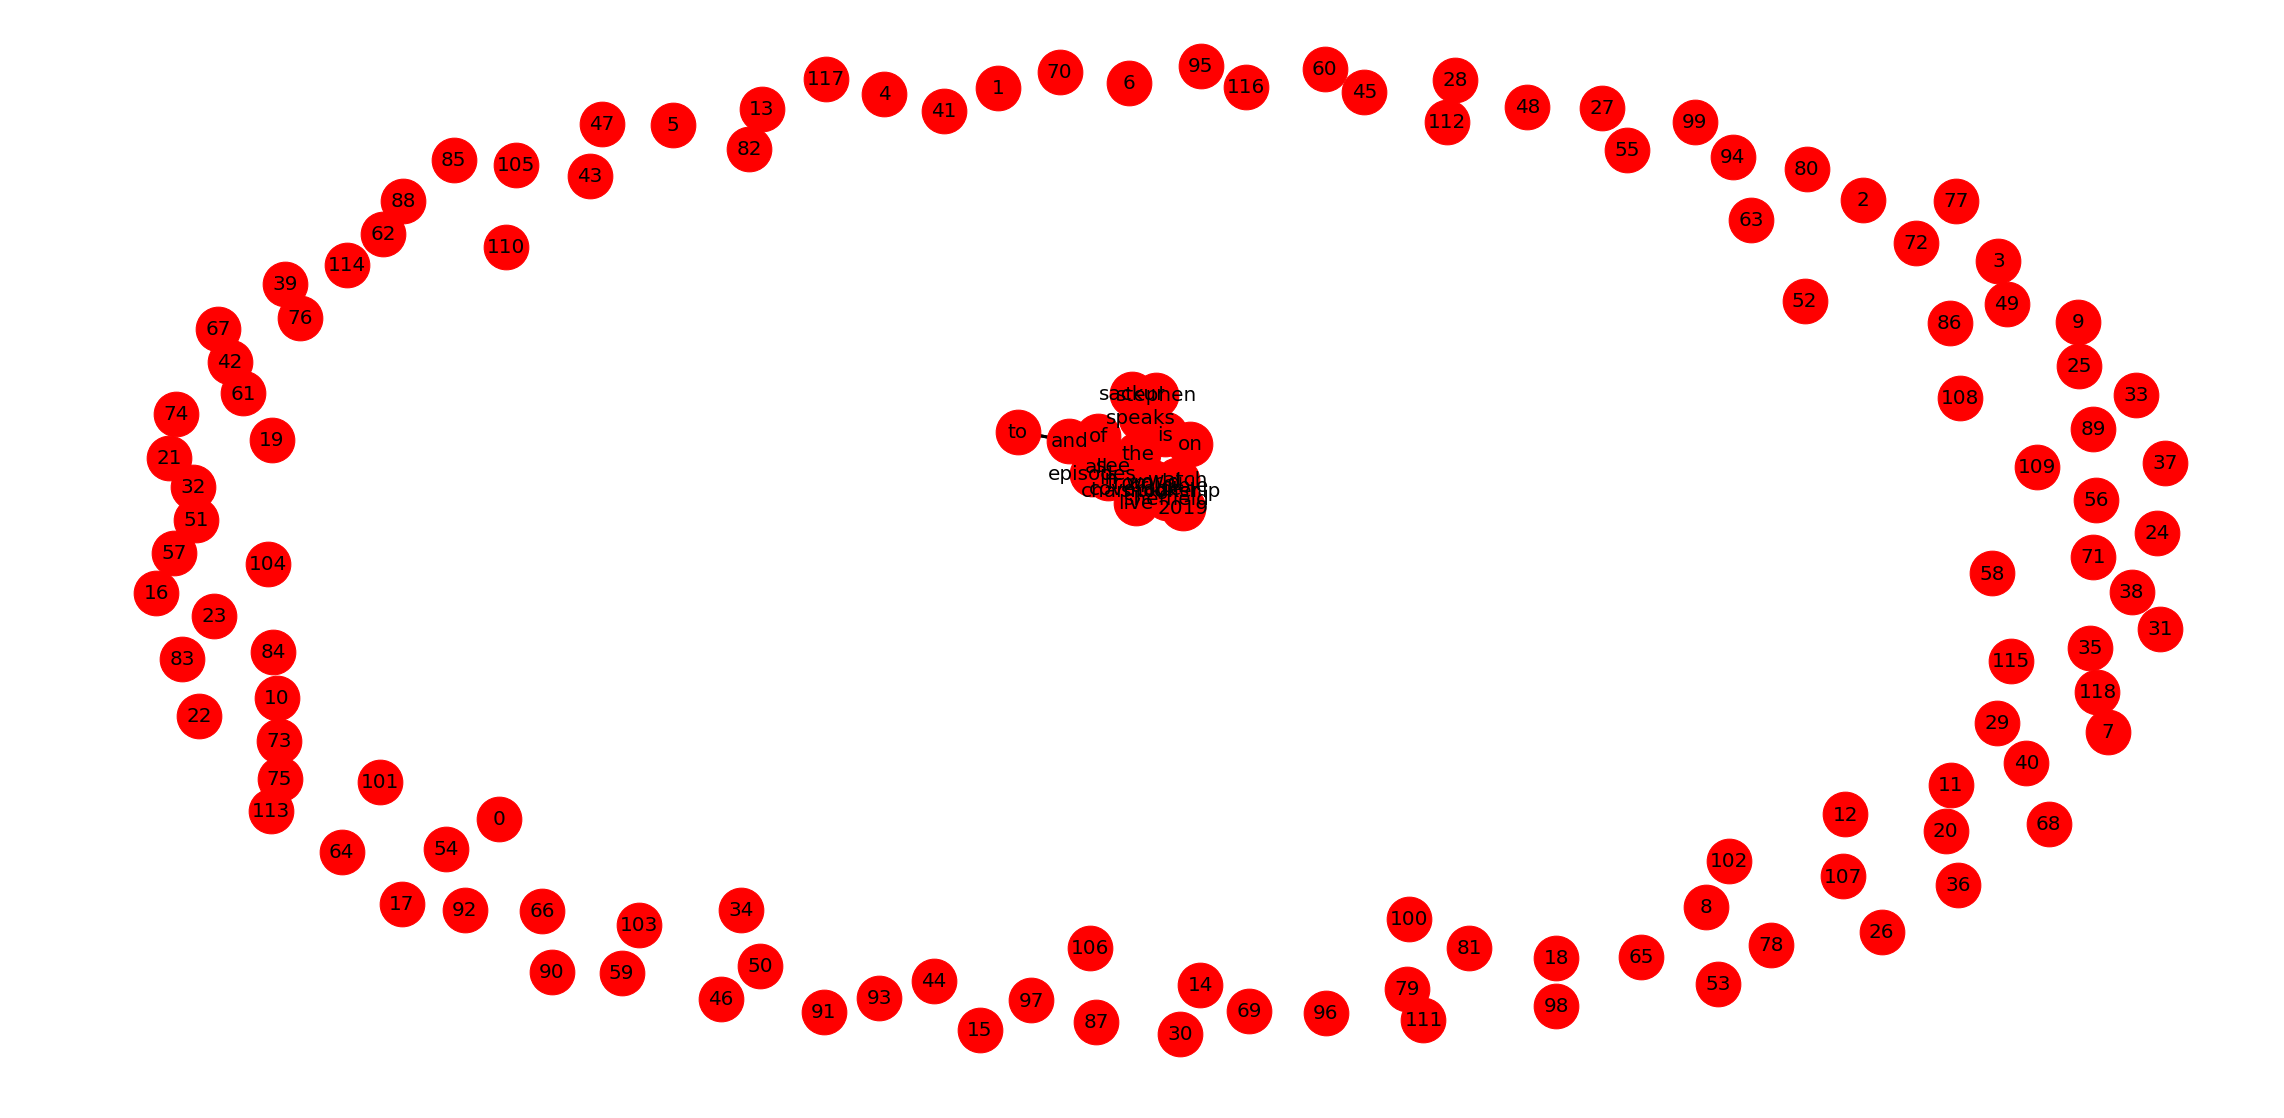

In [40]:
plt.figure(figsize=(40,20))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=2000)
nx.draw_networkx_edges(G, pos, width=3)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
#plt.savefig("weighted_graph.png") # save as png
plt.show()


In [73]:
# 常出現的itemsets
from networkx.algorithms.approximation import dominating_set
dominating_set.min_edge_dominating_set(G)

{('2019', 'championship'),
 ('all', 'episodes'),
 ('and', 'of'),
 ('crucible', 'coverage'),
 ('in', 'see'),
 ('live', 'world'),
 ('sheffield', 'watch'),
 ('snooker', 'from'),
 ('speaks', 'sackur'),
 ('the', 'is')}

結論：透過共線圖可看出關鍵詞的群聚現象，與部份重點議題